Purpose: Analyze CSV data to create final version

In [1]:
# %matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

In [2]:
# Test CSV file
properties_df = pd.read_csv("csv/listings_all.csv")
print(f"There are {len(properties_df)} rows.")
print(properties_df["airbnb_city"].value_counts())

There are 4726 rows.
Tampa        2960
Orlando      1420
Kissimmee     340
Name: airbnb_city, dtype: int64


# Data Cleaning

In [3]:
properties_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4726 entries, 0 to 4725
Data columns (total 40 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      4720 non-null   float64
 1   property_id             4720 non-null   float64
 2   source                  4720 non-null   object 
 3   status                  4726 non-null   object 
 4   night_priceـnative      4720 non-null   float64
 5   night_price             4720 non-null   float64
 6   weekly_price            4720 non-null   float64
 7   monthly_price           4720 non-null   float64
 8   cleaning_fee_native     4232 non-null   float64
 9   num_of_baths            4720 non-null   float64
 10  num_of_rooms            4717 non-null   float64
 11  occupancy               4720 non-null   float64
 12  nights_booked           4720 non-null   float64
 13  rental_income           4720 non-null   float64
 14  airbnb_neighborhood_id  4720 non-null   

In [4]:
properties_df.columns

Index(['id', 'property_id', 'source', 'status', 'night_priceـnative',
       'night_price', 'weekly_price', 'monthly_price', 'cleaning_fee_native',
       'num_of_baths', 'num_of_rooms', 'occupancy', 'nights_booked',
       'rental_income', 'airbnb_neighborhood_id', 'name', 'address',
       'airbnb_neighborhood', 'airbnb_city', 'state', 'capacity_of_people',
       'zip', 'property_type', 'room_type', 'room_type_category', 'amenities',
       'reviews_count', 'start_rating', 'reviews', 'created_at', 'updated_at',
       'last_seen', 'user_id', 'num_of_beds', 'lat', 'lon', 'image', 'url',
       'star_rating', 'content'],
      dtype='object')

#### Obvious columns that need to be dropped are:
source, updated_at, last_seen, user_id, property_id, image, url, content
Can't see the rest of the columns until we delete these.

In [5]:
# Dropping verified, non-beneficial columns from dataset
properties_df = properties_df.drop(
    columns=["source", "updated_at", "last_seen", "user_id", "property_id", "name",
    "image", "url", "content", "created_at", "address", "airbnb_neighborhood", "state"
    ])
properties_df.head()

,id,status,night_priceـnative,night_price,weekly_price,monthly_price,cleaning_fee_native,num_of_baths,num_of_rooms,occupancy,nights_booked,rental_income,airbnb_neighborhood_id,airbnb_city,capacity_of_people,zip,property_type,room_type,room_type_category,amenities,reviews_count,start_rating,reviews,num_of_beds,lat,lon,star_rating
0,33453937.0,ACTIVE,110.0,108.0,0.0,0.0,110.0,2.0,2.0,48.0,177.0,1593.0,268906.0,Orlando,4.0,32822.0,Apartment,Entire home/apt,entire_home,NaN,78.0,5.0,NaN,2.0,28.5049,-81.2989,5.0
1,33454729.0,ACTIVE,237.0,434.0,0.0,0.0,185.0,4.0,5.0,76.0,279.0,10091.0,268914.0,Orlando,16.0,32805.0,House,Entire home/apt,entire_home,NaN,136.0,5.0,NaN,8.0,28.5216,-81.4037,5.0
2,33453571.0,ACTIVE,345.0,341.0,0.0,0.0,125.0,2.0,2.0,46.0,167.0,4746.0,268881.0,Orlando,5.0,32789.0,Condominium,Entire home/apt,entire_home,NaN,58.0,5.0,NaN,2.0,28.5916,-81.3521,5.0
3,33460647.0,ACTIVE,175.0,171.0,0.0,0.0,125.0,2.0,3.0,52.0,191.0,2722.0,269050.0,Orlando,6.0,32804.0,House,Entire home/apt,entire_home,NaN,6.0,5.0,NaN,3.0,28.5683,-81.3854,5.0
4,33456754.0,ACTIVE,62.0,63.0,300.0,950.0,30.0,1.0,1.0,94.0,342.0,1796.0,268987.0,Orlando,2.0,32819.0,Condominium,Entire home/apt,entire_home,NaN,109.0,5.0,NaN,1.0,28.4561,-81.4700,5.0


In [6]:
properties_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4726 entries, 0 to 4725
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      4720 non-null   float64
 1   status                  4726 non-null   object 
 2   night_priceـnative      4720 non-null   float64
 3   night_price             4720 non-null   float64
 4   weekly_price            4720 non-null   float64
 5   monthly_price           4720 non-null   float64
 6   cleaning_fee_native     4232 non-null   float64
 7   num_of_baths            4720 non-null   float64
 8   num_of_rooms            4717 non-null   float64
 9   occupancy               4720 non-null   float64
 10  nights_booked           4720 non-null   float64
 11  rental_income           4720 non-null   float64
 12  airbnb_neighborhood_id  4720 non-null   float64
 13  airbnb_city             4720 non-null   object 
 14  capacity_of_people      4720 non-null   

In [7]:
# Review "id" column 
print("There are " + str(len(properties_df)) + " rows in the properties_df DataFrame.")
print("The id field has " + str(len(properties_df["id"].value_counts())) + " different types of values.")
duplicate_indicator = len(properties_df) - len(properties_df["id"].value_counts())
print(f"There are possibly {str(duplicate_indicator)} duplicates.")
properties_df[properties_df["id"].duplicated()]
# Should delete these duplicate rows

There are 4726 rows in the properties_df DataFrame.
The id field has 4720 different types of values.
There are possibly 6 duplicates.


,id,status,night_priceـnative,night_price,weekly_price,monthly_price,cleaning_fee_native,num_of_baths,num_of_rooms,occupancy,nights_booked,rental_income,airbnb_neighborhood_id,airbnb_city,capacity_of_people,zip,property_type,room_type,room_type_category,amenities,reviews_count,start_rating,reviews,num_of_beds,lat,lon,star_rating
4721,NaN,success,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4722,NaN,success,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4723,NaN,success,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4724,NaN,success,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4725,NaN,success,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
properties_df["id"].isna().sum()

6

In [9]:
properties_df = properties_df.dropna(axis=0, subset=["id"])
properties_df["id"].isna().sum()

0

In [10]:
properties_df["status"].value_counts()
#Should remove, useless

ACTIVE    4720
Name: status, dtype: int64

In [11]:
properties_df = properties_df.drop(columns=["status"])
properties_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4720 entries, 0 to 4719
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      4720 non-null   float64
 1   night_priceـnative      4720 non-null   float64
 2   night_price             4720 non-null   float64
 3   weekly_price            4720 non-null   float64
 4   monthly_price           4720 non-null   float64
 5   cleaning_fee_native     4232 non-null   float64
 6   num_of_baths            4720 non-null   float64
 7   num_of_rooms            4717 non-null   float64
 8   occupancy               4720 non-null   float64
 9   nights_booked           4720 non-null   float64
 10  rental_income           4720 non-null   float64
 11  airbnb_neighborhood_id  4720 non-null   float64
 12  airbnb_city             4720 non-null   object 
 13  capacity_of_people      4720 non-null   float64
 14  zip                     4706 non-null   

In [12]:
properties_df["property_type"].value_counts()
# May want group Bungalow and below into an "Other" category

House                 1663
Apartment             1014
Condominium            542
Guest suite            420
Guesthouse             369
Townhouse              204
Bungalow               177
Villa                   82
Loft                    57
Serviced apartment      57
Tiny house              55
Vacation home           36
Cottage                 24
Other                   12
Cabin                    4
Farm stay                3
Chalet                   1
Name: property_type, dtype: int64

In [13]:
properties_df["room_type"].value_counts()
# Good candidate for removing, all the fields are the same

Entire home/apt    4720
Name: room_type, dtype: int64

In [14]:
properties_df["room_type_category"].value_counts()
# Good candidate for removing, all the fields are the same

entire_home    4720
Name: room_type_category, dtype: int64

In [15]:
# Removing for now. We can add "room_type_category" back if we have time to get each one
properties_df = properties_df.drop(columns=["room_type_category"])

In [16]:
properties_df["amenities"].value_counts()
# Believe this data is in another json dataset. We have to pull this data for each one
# for 4K records, that might not be enough time to do that 

Series([], Name: amenities, dtype: int64)

In [17]:
# Removing for now. We can add "amenities" back if we have time to get each one
properties_df = properties_df.drop(columns=["amenities"])

In [18]:
properties_df["star_rating"].value_counts()

5.0    4478
4.0     227
3.0      12
1.0       1
Name: star_rating, dtype: int64

In [19]:
properties_df["start_rating"].value_counts()

5.0    4478
4.0     227
3.0      12
1.0       1
Name: start_rating, dtype: int64

In [20]:
# Believe "start_rating" column is a duplicate of star_rating
properties_df = properties_df.drop(columns=["start_rating"])

In [21]:
properties_df["star_rating"].isnull().sum()

2

In [22]:
#properties_df.dropna(subset = ['star_rating'])

In [23]:
properties_df["reviews"].value_counts()

Series([], Name: reviews, dtype: int64)

In [24]:
# Removing for now. We can add "reviews" back if we have time to get each one
# Believe this data is in another json dataset. We have to pull this data for each one
# for 4K records, that might not be enough time to do that 
properties_df = properties_df.drop(columns=["reviews"])

In [25]:
properties_df.to_csv("csv/clean_all_property_data.csv", index=False)
properties_df.head(2)

,id,night_priceـnative,night_price,weekly_price,monthly_price,cleaning_fee_native,num_of_baths,num_of_rooms,occupancy,nights_booked,rental_income,airbnb_neighborhood_id,airbnb_city,capacity_of_people,zip,property_type,room_type,reviews_count,num_of_beds,lat,lon,star_rating
0,33453937.0,110.0,108.0,0.0,0.0,110.0,2.0,2.0,48.0,177.0,1593.0,268906.0,Orlando,4.0,32822.0,Apartment,Entire home/apt,78.0,2.0,28.5049,-81.2989,5.0
1,33454729.0,237.0,434.0,0.0,0.0,185.0,4.0,5.0,76.0,279.0,10091.0,268914.0,Orlando,16.0,32805.0,House,Entire home/apt,136.0,8.0,28.5216,-81.4037,5.0


In [26]:
len(properties_df.columns)

22

In [27]:
success_indicators_df = properties_df[["id","nights_booked", "occupancy", "rental_income", "star_rating"]]
success_indicators_df.to_csv("csv/success_indicators.csv", index=False)
success_indicators_df.head()

,id,nights_booked,occupancy,rental_income,star_rating
0,33453937.0,177.0,48.0,1593.0,5.0
1,33454729.0,279.0,76.0,10091.0,5.0
2,33453571.0,167.0,46.0,4746.0,5.0
3,33460647.0,191.0,52.0,2722.0,5.0
4,33456754.0,342.0,94.0,1796.0,5.0


In [28]:
property_location_df = properties_df[["id", "airbnb_city", "lat", "lon", "star_rating"]]
property_location_df.to_csv("csv/property_locations.csv", index=False)
property_location_df.head()

,id,airbnb_city,lat,lon,star_rating
0,33453937.0,Orlando,28.5049,-81.2989,5.0
1,33454729.0,Orlando,28.5216,-81.4037,5.0
2,33453571.0,Orlando,28.5916,-81.3521,5.0
3,33460647.0,Orlando,28.5683,-81.3854,5.0
4,33456754.0,Orlando,28.4561,-81.4700,5.0


# Data Analysis

In [29]:
properties_df.describe()

,id,night_priceـnative,night_price,weekly_price,monthly_price,cleaning_fee_native,num_of_baths,num_of_rooms,occupancy,nights_booked,rental_income,airbnb_neighborhood_id,capacity_of_people,zip,reviews_count,num_of_beds,lat,lon,star_rating
count,4.720000e+03,4720.000000,4720.000000,4720.000000,4720.000000,4232.000000,4720.000000,4717.000000,4720.000000,4720.000000,4720.000000,4720.000000,4720.000000,4706.000000,4720.000000,4715.000000,4720.000000,4720.000000,4718.000000
mean,3.352554e+07,159.057415,146.870975,7.957415,20.204661,101.378072,1.591419,2.059996,47.260381,124.407839,2009.305720,206363.925212,5.253602,33452.054611,49.917797,2.865536,28.161419,-82.080250,4.945952
std,7.511158e+04,249.407326,88.279006,79.115775,217.657589,60.963646,0.863029,1.274965,25.933747,95.159355,1555.012083,84614.601550,2.990890,676.073369,73.496102,1.921605,0.252045,0.521119,0.242425
min,3.334208e+07,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18847.000000,1.000000,3308.000000,3.000000,0.000000,27.856400,-82.605500,1.000000
25%,3.345688e+07,82.000000,88.000000,0.000000,0.000000,55.000000,1.000000,1.000000,26.000000,44.000000,951.500000,125649.000000,3.000000,32822.000000,8.000000,1.000000,27.964100,-82.488225,5.000000
50%,3.357576e+07,120.500000,125.000000,0.000000,0.000000,94.000000,1.000000,2.000000,46.000000,101.000000,1665.500000,268887.000000,4.000000,33605.000000,23.000000,2.000000,28.010650,-82.446000,5.000000
75%,3.357882e+07,185.000000,180.000000,0.000000,0.000000,130.000000,2.000000,3.000000,68.000000,192.000000,2675.000000,269130.000000,6.000000,33614.000000,61.000000,4.000000,28.470600,-81.456575,5.000000
max,3.360290e+07,10309.000000,1918.000000,1700.000000,4000.000000,500.000000,10.500000,9.000000,100.000000,365.000000,14850.000000,276539.000000,25.000000,34786.000000,883.000000,18.000000,28.631200,-81.213000,5.000000


In [30]:
properties_df["num_of_beds"].value_counts()

1.0     1225
2.0     1221
3.0      908
4.0      589
5.0      283
6.0      208
7.0      108
8.0       67
9.0       42
0.0       25
10.0      21
11.0       9
13.0       3
12.0       3
15.0       1
18.0       1
14.0       1
Name: num_of_beds, dtype: int64

In [64]:
tampa_properties_df = properties_df.loc[properties_df['airbnb_city'] == "Tampa"]
orlando_properties_df = properties_df.loc[properties_df['airbnb_city'] == "Orlando"]
kissimmee_properties_df = properties_df.loc[properties_df['airbnb_city'] == "Kissimmee"]

In [65]:
properties_df['airbnb_city'].value_counts()

Tampa        2960
Orlando      1420
Kissimmee     340
Name: airbnb_city, dtype: int64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


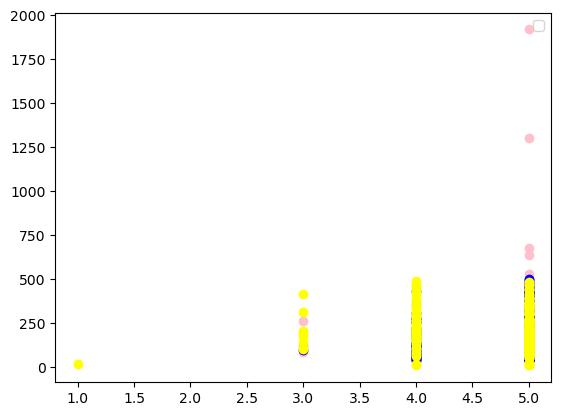

In [68]:
# multiple line plots
plt.scatter(tampa_properties_df['star_rating'], tampa_properties_df['night_price'], c="pink")
plt.scatter(orlando_properties_df['star_rating'], orlando_properties_df['night_price'], c="blue")
plt.scatter(kissimmee_properties_df['star_rating'], kissimmee_properties_df['night_price'], c="yellow")

# show legend
plt.legend()
# 
# show graph
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


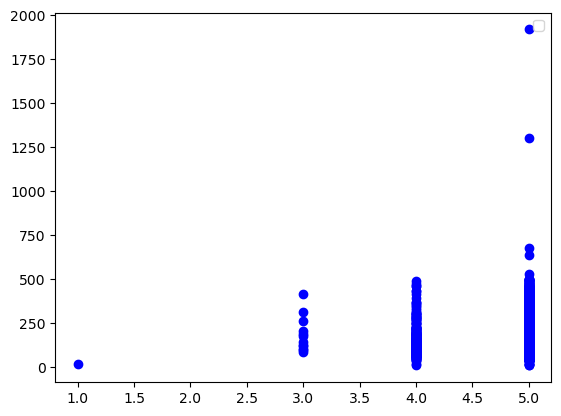

In [44]:
plt.scatter(properties_df["star_rating"], properties_df["night_price"], c ="blue")

# show legend
plt.legend()

# show graph
plt.show()

In [33]:
success_indicators_df.describe()

,id,nights_booked,occupancy,rental_income,star_rating
count,4.720000e+03,4720.000000,4720.000000,4720.000000,4718.000000
mean,3.352554e+07,124.407839,47.260381,2009.305720,4.945952
std,7.511158e+04,95.159355,25.933747,1555.012083,0.242425
min,3.334208e+07,0.000000,0.000000,0.000000,1.000000
25%,3.345688e+07,44.000000,26.000000,951.500000,5.000000
50%,3.357576e+07,101.000000,46.000000,1665.500000,5.000000
75%,3.357882e+07,192.000000,68.000000,2675.000000,5.000000
max,3.360290e+07,365.000000,100.000000,14850.000000,5.000000


In [34]:
property_location_df.describe()

,id,lat,lon,star_rating
count,4.720000e+03,4720.000000,4720.000000,4718.000000
mean,3.352554e+07,28.161419,-82.080250,4.945952
std,7.511158e+04,0.252045,0.521119,0.242425
min,3.334208e+07,27.856400,-82.605500,1.000000
25%,3.345688e+07,27.964100,-82.488225,5.000000
50%,3.357576e+07,28.010650,-82.446000,5.000000
75%,3.357882e+07,28.470600,-81.456575,5.000000
max,3.360290e+07,28.631200,-81.213000,5.000000
